# Training a CIFAR10 classifier

## Q1 定義神經網路模型 (30/100)

- 請建構一個用於分類 cifar10 資料的神經網路模型
- 於 1 個 batch data 測試正常後，得 30 分

## Q2 訓練模型並畫出 learning curve (50/100)

- 請訓練上題所定義的神經網路
- 畫出訓練誤差的學習曲線，得 50 分

## Q3 於測試資料上的正確率 (20/100)

- 請於測試資料上評估模型的好壞
- 給出模型於測試資料上的正確率，得 20 分

## 作業繳交規則

- 請將 .ipynb 檔名 "HW-cifar10-calssification" 加上 "-學號" 並匯出成 html 格式
- 將 .ipynb 與 html 上傳至 e3 以利批改

## 參考資料

- [Pytorch-cifar10-tutorial](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py)
- [PyTorch documentation](http://pytorch.org/docs/index.html)

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.autograd import Variable

import torchvision
from torchvision import datasets, transforms

# 載入 CIFAR10 資料

- 原始資料會下載在 "./data" 上一層的目錄底下

In [55]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 32

train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('./data', train=True, download=True, transform=transform),
    batch_size=batch_size)

test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('./data', train=False, transform=transform),
    batch_size=batch_size)

Files already downloaded and verified


## 取出一部分資料來視覺化

In [56]:
def show_grid_img(img_tensor):
    img_tensor = img_tensor / 2 + 0.5
    i = torchvision.utils.make_grid(img_tensor).numpy()
    i = np.transpose(i, (1, 2, 0))
    plt.imshow(i)

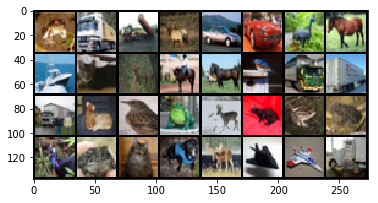

In [57]:
data, target = next(iter(train_loader))
show_grid_img(data)

## 每一個 batch 的資料維度

In [58]:
data.size()

torch.Size([32, 3, 32, 32])

In [59]:
target


 6
 9
 9
 4
 1
 1
 2
 7
 8
 3
 4
 7
 7
 2
 9
 9
 9
 3
 2
 6
 4
 3
 6
 6
 2
 6
 3
 5
 4
 0
 0
 9
[torch.LongTensor of size 32]

# Q1 定義神經網路模型 (40/100)

## 請根據 cifar10 資料特性設計神經網路架構

- 可以優先考慮使用 CNN
- 對於沒有 GPU 環境，請先嘗試較為簡單的模型，不然計算時間會太久

In [60]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self,x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## 測試模型能否正常運作

- 輸入 [batch_size, 3, 32, 32]
- 輸出 [batch_size, 10]

In [61]:
net = Net()

In [62]:
predict = net(Variable(data))

In [63]:
predict.size()

torch.Size([32, 10])

## 測試能否計算 loss

In [64]:
F.cross_entropy(predict, Variable(target))

Variable containing:
 2.2967
[torch.FloatTensor of size 1]

# Q2 訓練模型並畫出 learning curve

## 調整 batch_size

- 預設的 batch_size 為 32，可以嘗試 64, 128

In [65]:
transform = transforms.Compose([transforms.ToTensor(),
                               transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 64 # you can change batch size

train_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('./data', train=True, download=False, transform=transform),
    batch_size=batch_size)

test_loader = torch.utils.data.DataLoader(
    datasets.CIFAR10('./data', train=False, transform=transform),
    batch_size=batch_size)

## 選擇優化演算法

- 建議使用 Adam
- 如想使用 SGD 需要仔細調整 learning_rate，或加入 momentum

In [66]:
train_op = optim.Adam(net.parameters())
# train_op = optim.SGD(net.parameters(), lr=0.01)

## 訓練神經網路

- n_epochs 代表要把整個訓練資料循環過幾次
- train_loss_history 用來保存每個 epoch 的平均 batch_train_loss

In [67]:
%%time
n_epochs = 12 # you can change here
train_loss_history = []

for epoch in range(n_epochs):
    batch_train_loss_ = []

    for _, (data, target) in enumerate(train_loader):
        data, target = Variable(data), Variable(target)
        train_op.zero_grad()
        data_out = net(data)
        loss = F.cross_entropy(data_out, target)
        loss.backward()
        train_op.step()
        batch_train_loss_.append(loss.data[0])

    batch_train_loss = np.mean(batch_train_loss_)
    train_loss_history.append(batch_train_loss)
    print("epoch: {0}, train_loss: {1}".format(epoch, batch_train_loss))

epoch: 0, train_loss: 1.6602535299632861
epoch: 1, train_loss: 1.3515197430425288
epoch: 2, train_loss: 1.214223581811656
epoch: 3, train_loss: 1.114992334028644
epoch: 4, train_loss: 1.048251408369035
epoch: 5, train_loss: 0.9958123735454686
epoch: 6, train_loss: 0.9512167998287074
epoch: 7, train_loss: 0.9138537181155456
epoch: 8, train_loss: 0.8781254616234918
epoch: 9, train_loss: 0.8483027783043854
epoch: 10, train_loss: 0.8202236821431943
epoch: 11, train_loss: 0.7941177718703399
CPU times: user 4min 22s, sys: 59.8 s, total: 5min 22s
Wall time: 4min 56s


## 畫出每個 epoch 對 train_loss 的 learning curve

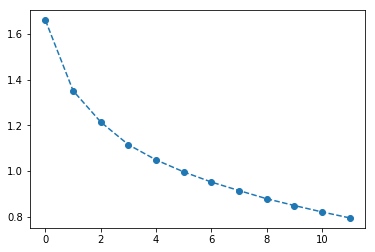

In [68]:
plt.plot(range(0, epoch + 1), train_loss_history, 'o--')

# Q3 於測試資料上的正確率

In [69]:
correct = 0
n_testsets = 0

for _, (data, target) in enumerate(test_loader):
    data_out = net(Variable(data))
    _, predicted = torch.max(data_out.data, 1)
    n_testsets += target.size(0)
    correct += (predicted == target).sum()

In [70]:
correct / n_testsets

0.6307